## EDA LAB

The General Social Survey (GSS) is a bi-annual nationally representative survey of Americans, with almost 7000 different questions asked since the survey began in the 1970s. It has straightforward questions about respondents' demographic information, but also questions like "Does your job regularly require you to perform repetitive or forceful hand movements or involve awkward postures?" or "How often do the demands of your job interfere with your family life?" There are a variety of controversial questions. No matter what you're curious about, there's something interesting in here to check out. The codebook is 904 pages (use CTRL+F to search it).

The data and codebook are available at:
https://gss.norc.org/us/en/gss/get-the-data.html

The datasets are so large that it might make sense to pick the variables you want, and then download just those variables from:
https://gssdataexplorer.norc.org/variables/vfilter

Here is your task:
1. Download a small (5-15) set of variables of interest.
2. Write a short description of the data you chose, and why. (1 page)
3. Load the data using Pandas. Clean them up for EDA. Do this in a notebook with comments or markdown chunks explaining your choices.
4. Produce some numeric summaries and visualizations. (1-3 pages)
5. Describe your findings in 1-2 pages.
6. If you have other content that you think absolutely must be included, you can include it in an appendix of any length.

For example, you might want to look at how aspects of a person's childhood family are correlated or not with their career or family choices as an adult. Or how political or religious affiliations correlate with drug use or sexual practices. It's an extremely wide-ranging survey.

Feel free to work with other people in groups, and ask questions!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("affrmact.csv")
df.head()


,category,name,label,response,breakdown,breakdown_category,year,percent,std_err
0,Civil Liberties,affrmact,Opinion of affirmative action,Oppose,Race,White,1994,25.48,1.48
1,Civil Liberties,affrmact,Opinion of affirmative action,Oppose,Race,White,1996,25.35,1.34
2,Civil Liberties,affrmact,Opinion of affirmative action,Oppose,Race,White,1998,22.56,1.32
3,Civil Liberties,affrmact,Opinion of affirmative action,Oppose,Race,White,2000,26.39,1.34
4,Civil Liberties,affrmact,Opinion of affirmative action,Oppose,Race,White,2002,26.98,2.12


Cleaning data if necessary:

In [3]:
# Renaming Columns
df.rename(columns={
    'category': 'Category',
    'name': 'Variable_Name',
    'label': 'Question_Label',
    'response': 'Response',
    'breakdown': 'Breakdown_Type',
    'breakdown_category': 'Race',
    'year': 'Year',
    'percent': 'Percentage',
    'std_err': 'Standard_Error'
}, inplace=True)

#Missing Values
print("Missing Values: ", df.isnull().sum())

# Converting 'year' to an integer in case it isn't already
df['Year'] = df['Year'].astype(int)

# Converting 'Percentage' to numeric
df['Percentage'] = pd.to_numeric(df['Percentage'], errors='coerce')



Missing Values:  Category          0
Variable_Name     0
Question_Label    0
Response          0
Breakdown_Type    0
Race              0
Year              0
Percentage        0
Standard_Error    0
dtype: int64


EDA:

In [4]:
df.describe()
df['Race'].value_counts()

,count
Race,
White,15
Black,15
Other,15


Visualizations:

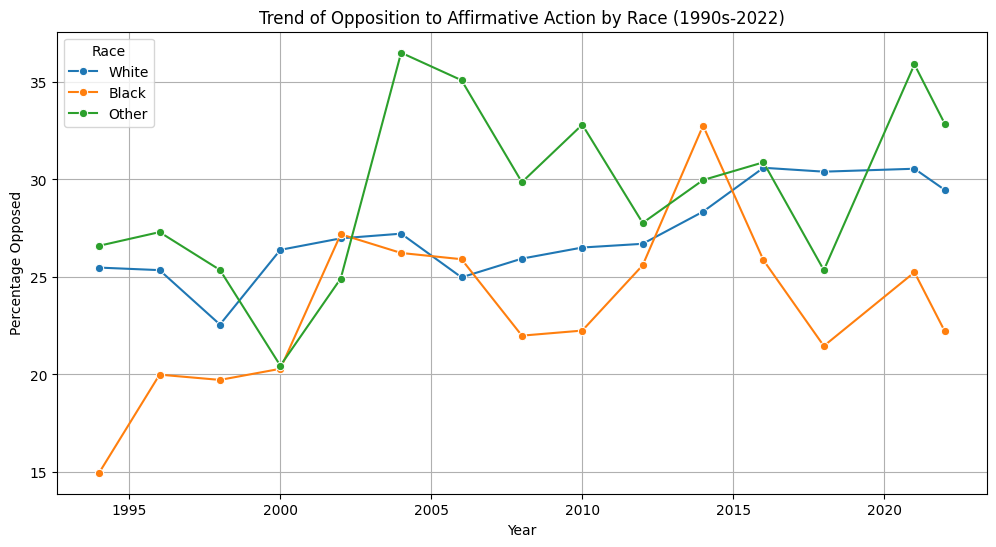

In [8]:
# Line Graph: Trends Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Percentage", hue="Race", marker="o")
plt.title("Trend of Opposition to Affirmative Action by Race (1990s-2022)")
plt.xlabel("Year")
plt.ylabel("Percentage Opposed")
plt.legend(title="Race")
plt.grid(True)
plt.show()


<ipython-input-16-f22ad13db556>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Race", y="Percentage", data=df, palette="Set2")


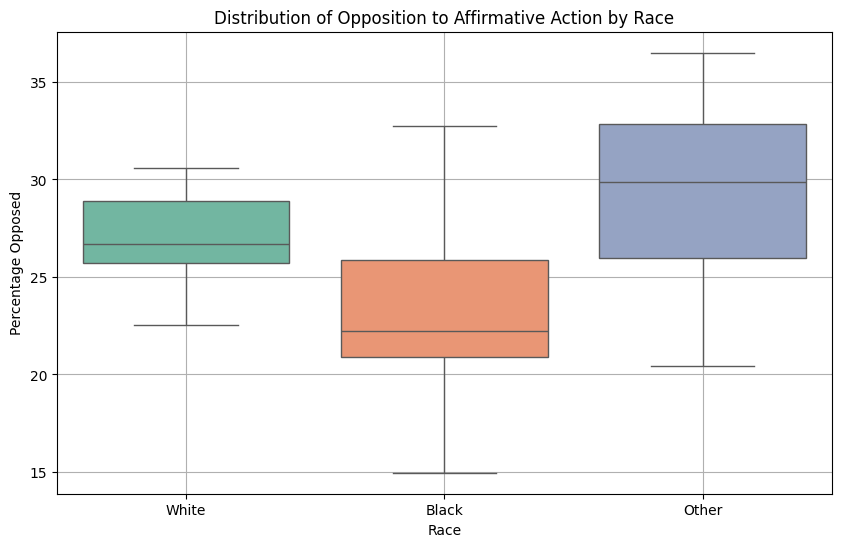

In [16]:
#Box Plot: Distribution of Opposition Percentages Over Time
plt.figure(figsize=(10, 6))
sns.boxplot(x="Race", y="Percentage", data=df, palette="Set2")
plt.title("Distribution of Opposition to Affirmative Action by Race")
plt.xlabel("Race")
plt.ylabel("Percentage Opposed")
plt.grid(True)
plt.show()


<ipython-input-31-4660c83ce8a5>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_opposition.index, y=avg_opposition.values, palette="Set1")


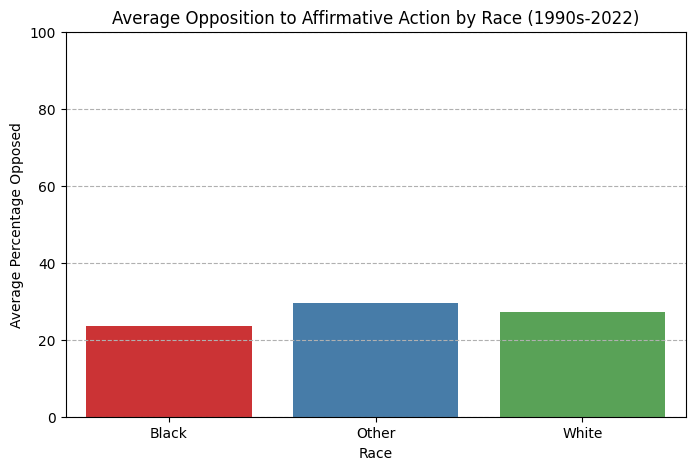

In [31]:
#Bar Chart: Average Opposition by Race
avg_opposition = df.groupby('Race')['Percentage'].mean()
plt.figure(figsize=(8, 5))
sns.barplot(x=avg_opposition.index, y=avg_opposition.values, palette="Set1")
plt.title("Average Opposition to Affirmative Action by Race (1990s-2022)")
plt.xlabel("Race")
plt.ylabel("Average Percentage Opposed")
plt.ylim(0, 100)
plt.grid(axis="y", linestyle="--")
plt.show()

Numeric Summaries:

In [19]:
#Average Opposition Percentage by Race
avg_opposition = df.groupby("Race")["Percentage"].mean()
avg_opposition

,Percentage
Race,
Black,23.445333
Other,29.442000
White,27.165333


In [26]:
# years with highest and lowest opposition per race
max_opposition = df.loc[df.groupby("Race")["Percentage"].idxmax()]
min_opposition = df.loc[df.groupby("Race")["Percentage"].idxmin()]

print("\nYears with Highest Opposition per Race:\n", max_opposition[["Race", "Year", "Percentage"]])
print("\nYears with Lowest Opposition per Race:\n", min_opposition[["Race", "Year", "Percentage"]])



Years with Highest Opposition per Race:
      Race  Year  Percentage
25  Black  2014       32.76
35  Other  2004       36.50
11  White  2016       30.60

Years with Lowest Opposition per Race:
      Race  Year  Percentage
15  Black  1994       14.96
33  Other  2000       20.45
2   White  1998       22.56


In [28]:
# Standard deviation of opposition by year
std_dev_by_year = df.groupby("Year")["Percentage"].std()
std_dev_by_year

,Percentage
Year,
1994,6.421506
1996,3.785239
1998,2.820024
2000,3.476569
2002,1.254366
2004,5.665266
2006,5.587924
2008,3.935010
2010,5.312739


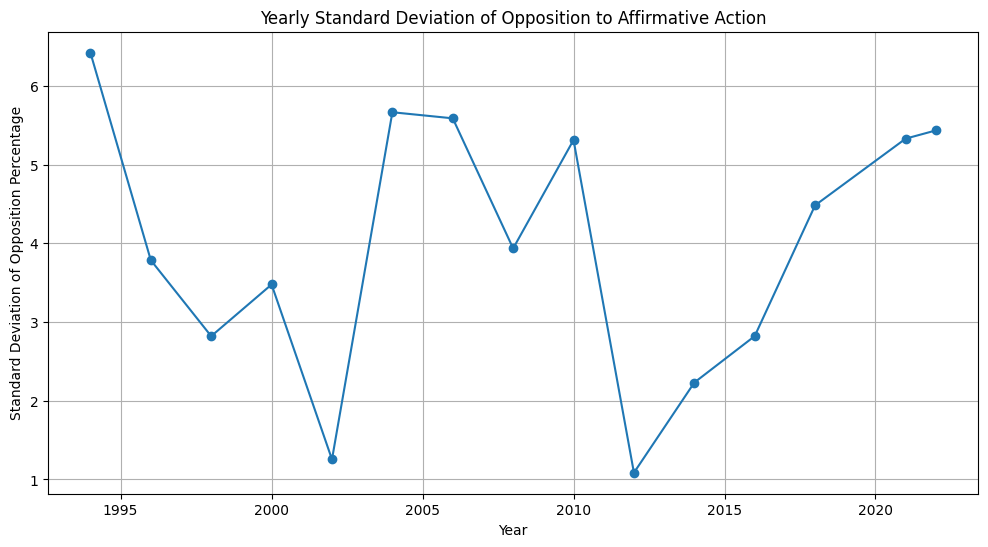

In [30]:
# Standard deviation of opposition by year graphed
plt.figure(figsize=(12, 6))
std_dev_by_year.plot(marker='o', linestyle='-')
plt.title("Yearly Standard Deviation of Opposition to Affirmative Action")
plt.xlabel("Year")
plt.ylabel("Standard Deviation of Opposition Percentage")
plt.grid(True)
plt.show()